• Dataset for the Task: "bank.csv"

1.Load the provided dataset and import in pandas DataFrame.

2.Check info of the DataFrame and identify following: (a) columns with dtypes=object (b) unique values of those columns. (c) check for the total number of null values in each column.

3.Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”

4.Read ”banknumericdata.csv” and Find the summary statistics.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Concepts and technonolgy/bank .csv")

print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [2]:
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:", object_columns)

Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [3]:
for col in object_columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print()

Unique values in column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in column 'marital':
['married' 'single' 'divorced']

Unique values in column 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in column 'default':
['no' 'yes']

Unique values in column 'housing':
['yes' 'no']

Unique values in column 'loan':
['no' 'yes']

Unique values in column 'contact':
['unknown' 'cellular' 'telephone']

Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in column 'poutcome':
['unknown' 'failure' 'other' 'success']

Unique values in column 'y':
['no' 'yes']



In [4]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [29]:

df_numeric = df_bank.drop(columns=object_columns)

df_numeric.to_csv("banknumericdata.csv", index=False)

print("Numeric DataFrame saved as 'banknumericdata.csv'")

Numeric DataFrame saved as 'banknumericdata.csv'


In [24]:
df_numeric_read = pd.read_csv("banknumericdata.csv")

# Get summary statistics
summary_stats = df_numeric_read.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

Problem 2 - Data Imputations: Complete all the following Task: • Dataset for the Task: "medical_student.csv"

1.Load the provided dataset and import in pandas DataFrame.

2.Check info of the DataFrame and identify column with missing (null) values.

3.For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.

4.Check for any duplicate values present in Dataset and do necessary to manage the duplicate items. {Hint: dataset.duplicated.sum()}

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Concepts and technonolgy/medical_students_dataset.csv")


print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [11]:
print(df.info())
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight         

In [12]:
for col in missing_columns.index:
    if df[col].dtype in ['int64', 'float64']:

        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in '{col}' using mean: {df[col].mean()}")
    elif df[col].dtype == 'object':

        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' using mode: {df[col].mode()[0]}")

<ipython-input-12-09075ca2d297>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-12-09075ca2d297>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Filled missing values in 'Student ID' using mean: 49974.042077777776
Filled missing values in 'Age' using mean: 26.02156111111111
Filled missing values in 'Gender' using mode: Male
Filled missing values in 'Height' using mean: 174.94710266857416
Filled missing values in 'Weight' using mean: 69.97158509186077
Filled missing values in 'Blood Type' using mode: B
Filled missing values in 'BMI' using mean: 23.338869359639226
Filled missing values in 'Temperature' using mean: 98.60094787707666
Filled missing values in 'Heart Rate' using mean: 79.50376666666666
Filled missing values in 'Blood Pressure' using mean: 114.55803333333333
Filled missing values in 'Cholesterol' using mean: 184.4863611111111
Filled missing values in 'Diabetes' using mode: No
Filled missing values in 'Smoking' using mode: No


In [13]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_count} duplicate rows.")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 12572
Removed 12572 duplicate rows.


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”: Dataset Used: "titanic.csv" Problem - 1: Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

In [14]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Copy of Titanic-Dataset.csv")


print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
columns = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
subset_df = df[columns]

print(subset_df.head())

                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  
0   7.2500         0  
1  71.2833         1  
2   7.9250         1  
3  53.1000         1  
4   8.0500         0  


In [16]:
first_class_df = subset_df[subset_df['Pclass'] == 1]


print(first_class_df.head())

fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")

                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2: How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

In [17]:
null_count_age = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count_age}")

first_class_df_cleaned = first_class_df.dropna(subset=['Age'])


null_count_age_after = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_count_age_after}")

Number of null values in the 'Age' column: 30
Number of null values in 'Age' column after dropping: 0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka- tion:

• ’C’ for Cherbourg • ’Q’ for Queenstown • ’S’ for Southampton Task:

1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).

2. Add these new columns to the original DataFrame.

3. Drop the original ’Embarked’ column.

4. Print the first few rows of the modified DataFrame to verify the changes.

In [18]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Copy of Titanic-Dataset.csv")


embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')


df = pd.concat([df, embarked_encoded], axis=1)


df.drop(columns=['Embarked'], inplace=True)


print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual- ization to show how the survival distributions vary by gender.

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


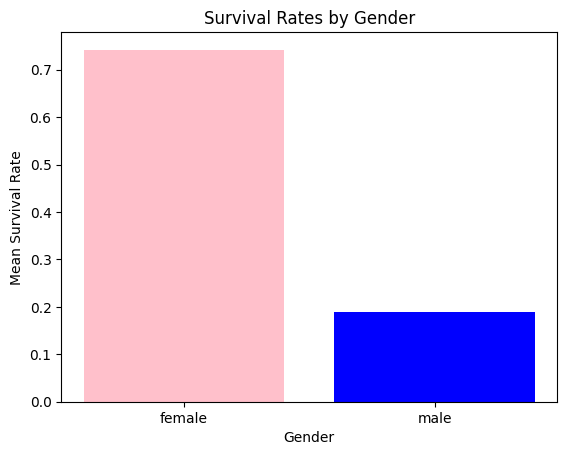

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Copy of Titanic-Dataset.csv')


survival_rates = df.groupby('Sex')['Survived'].mean()

print("Mean Survival Rates by Gender:")
print(survival_rates)

genders = survival_rates.index
rates = survival_rates.values

plt.bar(genders, rates, color=['pink', 'blue'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em- barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Survival Rates by Gender and Embarkation Port:
Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


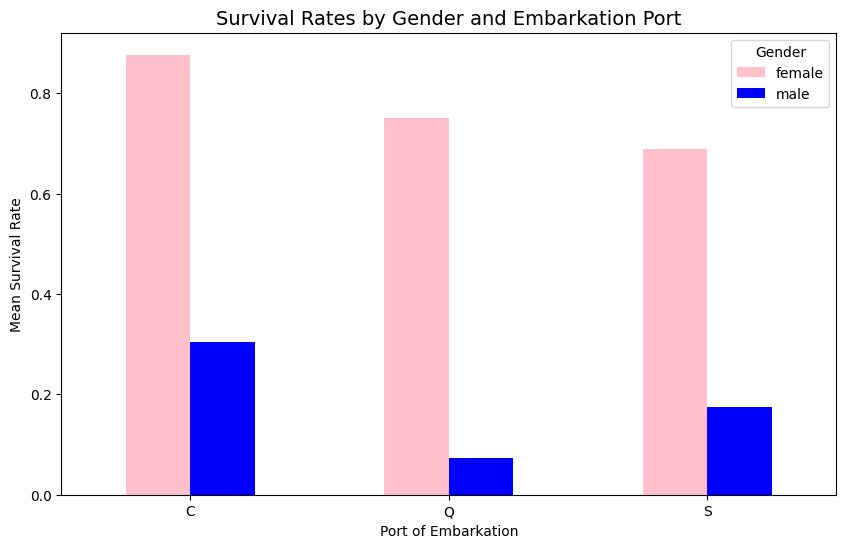

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Copy of Titanic-Dataset.csv')

df = df[df['Embarked'].isin(['C', 'Q', 'S'])]


survival_rates = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()

print("Survival Rates by Gender and Embarkation Port:")
print(survival_rates)


survival_rates.plot(kind='bar', figsize=(10, 6), color=['pink', 'blue'])

plt.title('Survival Rates by Gender and Embarkation Port', fontsize=14)
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

Survival Rates by Age Group and Passenger Class:
AgeGroup        Q1        Q2        Q3        Q4        Q5
Pclass                                                    
1         0.809524  0.761905  0.666667  0.777778  0.506667
2         0.742857  0.400000  0.416667  0.461538  0.363636
3         0.333333  0.197674  0.283582  0.166667  0.088235


<ipython-input-30-4ed0e372863e>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


<Figure size 1200x800 with 0 Axes>

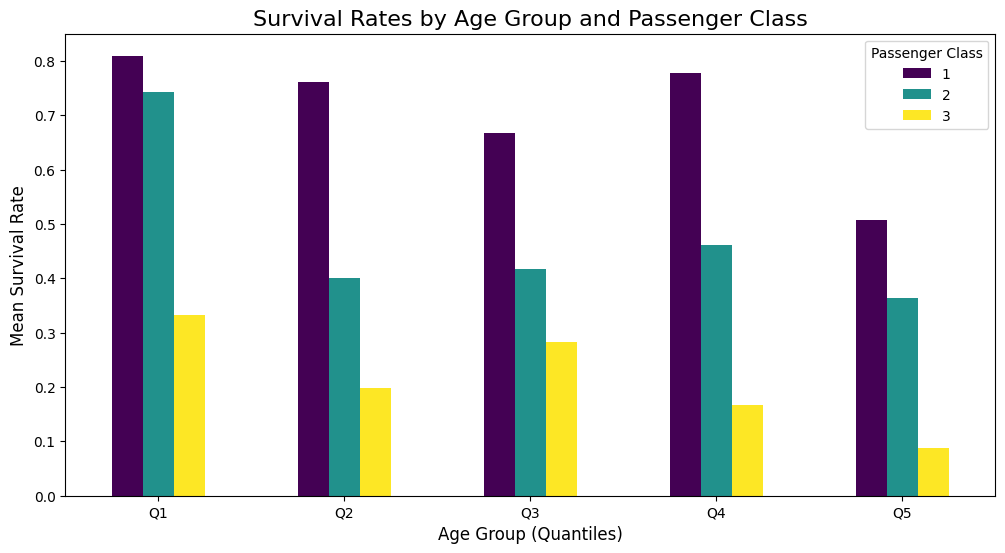

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Copy of Titanic-Dataset.csv')

df = df.dropna(subset=['Age'])


df['AgeGroup'] = pd.qcut(df['Age'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


survival_rates = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()

print("Survival Rates by Age Group and Passenger Class:")
print(survival_rates)


plt.figure(figsize=(12, 8))
survival_rates.T.plot(kind='bar', figsize=(12, 6), cmap='viridis')

plt.title('Survival Rates by Age Group and Passenger Class', fontsize=16)
plt.xlabel('Age Group (Quantiles)', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.legend(title='Passenger Class', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()